In [9]:
import numpy as np
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import math 
style.use('ggplot')

In [10]:
def hypothesis(x,w,j):
    h = w[0]
    X=np.ones((len(w), len(x)))
    for i in np.arange(1, len(w)):                
        X[i] = x ** (i)
    X=np.transpose(X)
    h= X@w
    return h

In [11]:
#errors
def error(X, y, w, i, j):
    if(i==0): #mean_square_error
        y1 = hypothesis(X,w,j)
        return sum((y1-y)**2)/(y.size)
    elif i==1: #mean_absolute_error
        y1 = hypothesis(X,w,j)
        return sum(abs(y1-y))/(y.size)
    elif i==2: #log_cosh_loss
        y1 = hypothesis(X,w,j)
        std = math.sqrt(noise(X,w,y))
        return np.sum(np.log(np.cosh((y1-y)/std)))/(y.size)
    elif i==3: #root_mean_square_error
        y1 = hypothesis(X,w,j)
        return np.sqrt(sum((y1-y)**2)/(y.size))
    elif i==4: #log loss
        y1 = hypothesis(X,w,j)
        print(std)
        return -sum(np.log(np.abs(y1-y))/(y.size))
    elif i==5: #KLDivergence
        y1 = hypothesis(X,w,j)
        return np.sum(y1 *( np.log(abs(y1))-np.log(abs(y))))/y.size

In [12]:
#gradient functions
def grad(X, y, h, err,std=0):
    n=y.size
    if err==0:
        return (2/n)*np.dot(np.transpose(X), h-y)
    elif err==1:
        return (1/n)*np.dot(np.transpose(X),np.sign(h-y))    
    elif err==2:
        return (1/n)*np.dot(np.transpose(X), np.tanh((h-y)/std))
    elif err==3:
        return np.dot(np.transpose(X), h-y)/(np.sqrt(sum((h-y)**2))*n)
    elif err==4:
        return (-1/n)*np.dot((np.transpose(X),np.transpose(np.linalg.pinv(h-y))))
    elif err==5:
        return np.add(np.dot(np.transpose(X),np.log(np.abs(h/y))) , np.dot(np.transpose(X),y))

In [13]:
#basis functions
def basis(x,i):
    if(i==0):
        return x
    elif(i==1):
        #gaussian
        return np.exp(-(x**2)/2)
    elif(i==2):
        #sigmoid
        return 1/(1+np.exp(-x))
    elif(i==3):
        #tanh
        return (1-np.exp(-x))/(1+np.exp(-x))

In [14]:
#noise variance
def noise(x,w,y):
    return error(x, y, w, 0, 0)

In [15]:
def mini_batch_maker(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y.reshape(len(y),-1)))
    np.random.shuffle(data)
    i = 0
    for i in range(0, (math.floor(data.shape[0]/batch_size)) ):
        mini_batch = data[i * batch_size:(i + 1)*batch_size , :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

def gradient_descent(x, y,X_test,Y_test, order=3, batch_size=1, err=1, basis=0, tol = 10**-5, numIters = 1000, learningRate = 0.01):
    n = len(x)
    w = np.zeros((order + 1,1))           
    costs = []
    minicosts= []
    X=np.ones((order+1, len(x)))
    for i in np.arange(1, order+1):                
        X[i] = x ** (i)
    X=np.transpose(X)
    for i in range(numIters):
        mini_batches = mini_batch_maker(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            h = hypothesis(X_mini[:,1], w, 0)
            w += -learningRate * grad(X_mini, y_mini, h, err)
            cost =error(X_mini[:,1], y_mini, w, err , 0)
            minicosts.append(cost)

    plt.figure(1)
    plt.scatter(x,y,c='b')
    plt.scatter(X_test,Y_test,c='r')
    func = w[0]
    labelr= []
    labelr.append('%.*f' % (2, w[0]))
    for i in np.arange(1, len(w)):            
        labelr.append(' + ' +'%.*f' % (2, w[i]) + 'x^' + str(i) ) 
    label = ''.join(labelr)
    print(label)
    print('For mini-batch size: '+ str(batch_size))
    func= hypothesis(x,w,0)
    plt.plot(x, func)        
    plt.title('Polynomial Fit: Order ' + str(len(w)-1))
    plt.xlabel('x')
    plt.ylabel('y') 
    
    plt.figure(2)
    plt.plot( minicosts)
    plt.xlabel('Iterations')
    plt.ylabel('cost')
    plt.title('Cost vs Iterations of Gradient Descent')
    
    plt.show()
    return w

In [16]:
def main_f(order,what,size, batch_size=5, numIters = 1000,tol = 10**-5, learningRate = 0.001, err = 0):
    if(err==0):
        print('mean_square_error')
    elif err==1:
        print('mean_absolute_error')
    elif err==2: 
        print('log_cosh_loss')
    elif err==3: 
        print('root_mean_square_error')
    elif err==4: 
        print('log loss')
    elif err==5: 
        print('KLDivergence')
        
    if(what==0):
        print('Calculating w by psuedo_inverse')
    elif what==1:
        print('Calculating w by gradient descent')
        
    print('Polynomial Order:' + str(order))
    
    data_set= pd.read_csv("https://web.iitd.ac.in/~seshan/a1/group09.txt", sep="\s+")
    global X
    global Y
    X = data_set.iloc[:size,0].values
    Y = data_set.iloc[:size,1].values
    X_train = []
    X_test = []
    Y_train = []
    Y_test = []
    for i in range(0,20):
        if i%5 == 0:
            X_test.append(data_set.iloc[i,0])
            Y_test.append(data_set.iloc[i,1])
        else:
            X_train.append(data_set.iloc[i,0])
            Y_train.append(data_set.iloc[i,1])  
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    
    if what == 0:
        return perf_on_test(X_train, Y_train, X_test, Y_test,order)     
    else:
        w = gradient_descent(X_train, Y_train, X_test, Y_test, order,batch_size, err, 0, tol, numIters, learningRate)
        cost_train= error(X_train, Y_train, w,err,0)
        print('Training Cost: ' + str(cost_train))
        cost_test= error(X_test, Y_test, w, err,0)
        print('Testing Cost: ' + str(cost_test))
        noisee = noise(X,w,Y)
        print('Noise: ' + str(noisee))

log_cosh_loss
Calculating w by gradient descent
Polynomial Order:1
-0.00 + 0.00x^1
For mini-batch size: 1


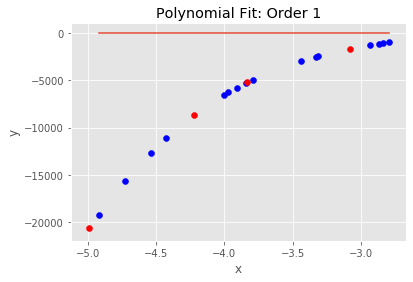

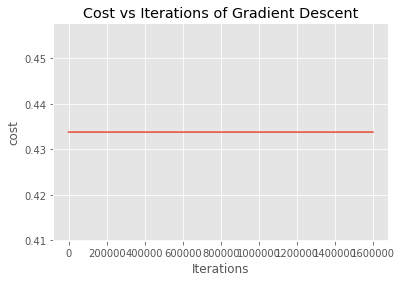

TypeError: only size-1 arrays can be converted to Python scalars

In [17]:
for i in range(1,10):
    main_f(i,1,20, 1, 100000,10**-5, 0.0000000001,2)

In [ ]:
for i in range(1,10):
    main_f(i,1,20, 5, 100000,10**-5, 0.0000000001,2)

log_cosh_loss
Calculating w by gradient descent
Polynomial Order:2
-0.00 + 0.00x^1 + -0.00x^2
For mini-batch size: 1


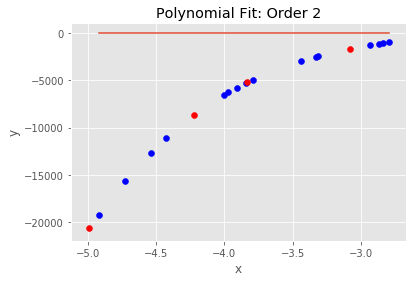

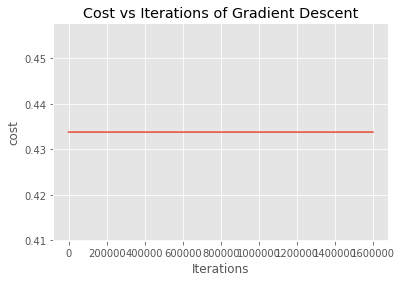

TypeError: only size-1 arrays can be converted to Python scalars

In [18]:
 main_f(2,1,20, 1, 100000,10**-5, 0.0000000001,2)